In [ ]:
'''
LAB Program 4.4.2024
Priyadharshini G
•
Apr 4
100 points
1. Download Automobile_data.csv from online. Export it google colab and do the following

a) Find the most expensive car company name
b)  Print All Toyota Cars details
c) Count total cars per company
d) Sort all cars by Price column
e) Find each company’s Highest price car
f) Implement K Nearest Neighbor regressor to perform price prediction and provide its outcome
'''

In [3]:
import pandas as pd

df = pd.read_csv('Automobile_data.csv')
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Read the CSV file
df = pd.read_csv("Automobile_data.csv")

# Convert 'price' column to numeric (handle non-numeric values by setting errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# a) Find the most expensive car company name
most_expensive_company = df.loc[df['price'].idxmax(), 'make']
print("Most expensive car company:", most_expensive_company)

# b) Print All Toyota Cars details
toyota_cars = df[df['make'] == 'toyota']
print("All Toyota cars details:")
print(toyota_cars)

# c) Count total cars per company
total_cars_per_company = df['make'].value_counts()
print("Total cars per company:")
print(total_cars_per_company)

# d) Sort all cars by Price column
sorted_cars_by_price = df.sort_values(by='price', ascending=False)
print("Cars sorted by Price column:")
print(sorted_cars_by_price)

# e) Find each company’s Highest price car
highest_price_per_company = df.groupby('make')['price'].max()
print("Each company’s highest price car:")
print(highest_price_per_company)

# f) Implement K Nearest Neighbor regressor to perform price prediction and provide its outcome
# Assuming 'horsepower' is a feature used for prediction
# Convert 'horsepower' column to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Drop rows with missing values
df.dropna(subset=['horsepower', 'price'], inplace=True)

# Split the data into features and target
X = df[['horsepower']]
y = df['price']

# Train K Nearest Neighbor regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X, y)

# Predict prices
y_pred = knn_regressor.predict(X)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


Most expensive car company: mercedes-benz
All Toyota cars details:
     symboling normalized-losses    make fuel-type aspiration num-of-doors  \
150          1                87  toyota       gas        std          two   
151          1                87  toyota       gas        std          two   
152          1                74  toyota       gas        std         four   
153          0                77  toyota       gas        std         four   
154          0                81  toyota       gas        std         four   
155          0                91  toyota       gas        std         four   
156          0                91  toyota       gas        std         four   
157          0                91  toyota       gas        std         four   
158          0                91  toyota    diesel        std         four   
159          0                91  toyota    diesel        std         four   
160          0                91  toyota       gas        std         four 

In [2]:
def evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
    from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report
    from sklearn.model_selection import learning_curve
    from sklearn.metrics import roc_curve, auc

    # Train the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, classifier.predict_proba(
        X_test), average='weighted', multi_class='ovr')
    average_precision = average_precision_score(
        y_test, classifier.predict_proba(X_test), average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)
    logloss = log_loss(y_test, classifier.predict_proba(X_test))
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(
        X_test), pos_label=classifier.classes_[1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-',
             color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-',
             color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()

In [14]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file and replace '?' with NaN
df = pd.read_csv("Automobile_data.csv", na_values='?')

# Convert 'price' column to numeric (handle non-numeric values by setting errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing values in the 'price' column
df.dropna(subset=['price'], inplace=True)

categorical_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
                    'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 
                    'fuel-system']

numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
                'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# Define preprocessing steps for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to the dataframe
X = preprocessor.fit_transform(df.drop(columns=['price']))
y = df['price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
knn_classifier = KNeighborsRegressor(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 34232463.32195122


In [6]:
def evaluate_model_regressor(regressor, X_train, X_test, y_train, y_test):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.model_selection import learning_curve

    # Train the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate and print metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)

    # Plot scatter plot of actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.show()

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        regressor, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), scoring='neg_mean_squared_error', n_jobs=-1)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Mean Squared Error")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-',
             color="r", label="Training MSE")
    plt.plot(train_sizes, test_scores_mean, 'o-',
             color="g", label="Cross-validation MSE")
    plt.legend(loc="best")
    plt.show()


Mean Squared Error: 34232463.32195122
R^2 Score: 0.7202013387078465


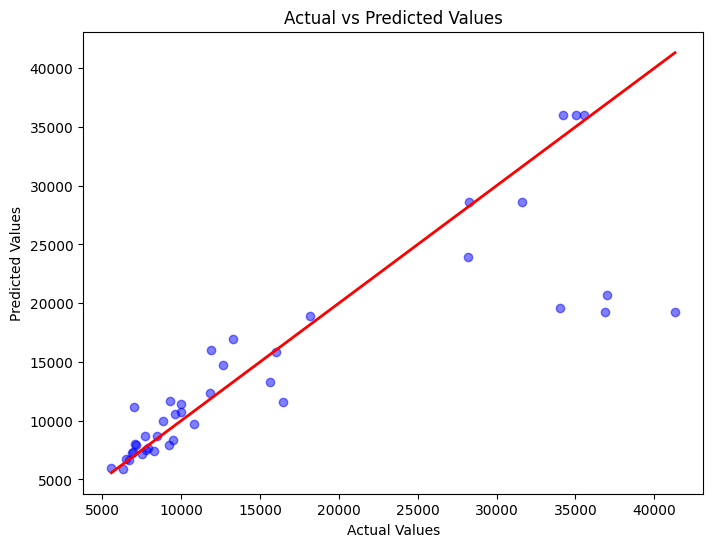

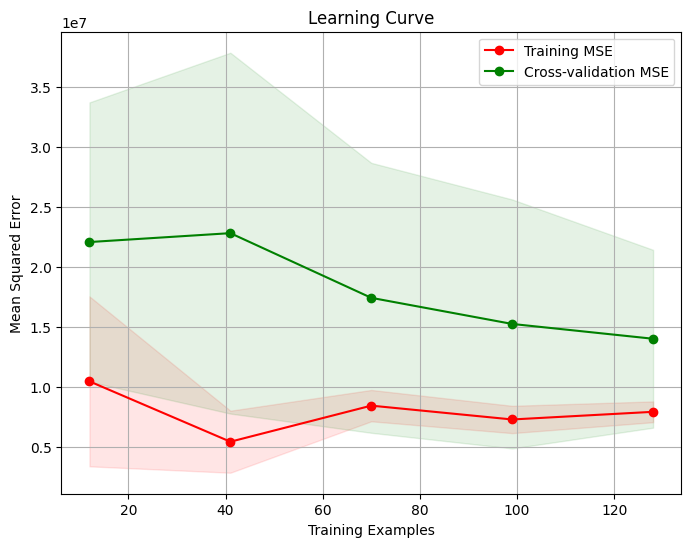

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file and replace '?' with NaN
df = pd.read_csv("Automobile_data.csv", na_values='?')

# Convert 'price' column to numeric (handle non-numeric values by setting errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing values in the 'price' column
df.dropna(subset=['price'], inplace=True)

categorical_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
                    'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 
                    'fuel-system']

numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
                'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# Define preprocessing steps for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to the dataframe
X = preprocessor.fit_transform(df.drop(columns=['price']))
y = df['price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
knn_classifier = KNeighborsRegressor(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate the model using the evaluate_model function
# evaluate_model(knn_classifier, X_train, X_test, y_train, y_test)

# Train the model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Evaluate the model using the evaluate_model_regressor function
evaluate_model_regressor(knn_regressor, X_train, X_test, y_train, y_test)
